In [7]:
import MagmaPandas.geochemistry.volatile_solubility.Allison2022 as a
import MagmaPandas.geochemistry.volatile_solubility.IaconoMarziano as im
from MagmaPandas.geochemistry.eos_volatiles import hollowayBlank as h
a_config = a.Allison_configuration()
a_config.model = "mixed"
a_config.print()


## Allison (2022) volatile solubility ##
Settings________________________________
Fugacity model.............hollowayBlank
Species model......................mixed

Calibration range______________________
Temperature..................1273-1673°K
Pressure........................< 7 kbar


In [8]:
# import pandas as pd
import MagmaPandas as mp
import MagmaPandas.parse.readers as r
import pandas as pd
import elements as e
import numpy as np
import matplotlib.pyplot as plt
import VESIcal as v
import meltInc.plotting as p
config = mp.configuration()

p.layout()

In [9]:
config.print()

Kd Fe-Mg ol-melt.......................toplis
Melt Fe3+/Fe2+........................borisov
Melt thermometer...............putirka2008_14
Volatile solubility model......IaconoMarziano


In [18]:
melt = mp.read_melt_inclusion('./melt.csv', index_col=['name'], total_col='total')
inclusion = melt.iloc[5, :].copy()
inclusion

SiO2     47.640301
Al2O3    15.994900
MgO       7.839920
CaO       9.535210
FeO       9.649520
Na2O      3.696120
K2O       1.227320
MnO       0.124901
TiO2      2.344470
P2O5      0.417008
Cr2O3          NaN
CO2       0.139300
H2O       1.016662
F         0.078800
S         0.112300
Cl        0.053900
total    99.870644
dtype: float32

In [11]:
P_bar = 3e3
T_K = 1200+273.15

In [12]:
cations = a.co2._cation_fractions_Allison(inclusion)
a.co2._deltaV(cations), a.co2._lnK0(cations)


(14.907897195121677, -14.616529170731717)

In [13]:
s0, s1 = im.calculate_saturation(inclusion, T_K, output="both"), a.calculate_saturation(inclusion, T_K, output="both")
s0, s1

(array([1.66098418e+03, 8.19021124e-02]),
 array([1.96030008e+03, 5.46322780e-02]))

In [14]:
a.mixed._saturation_rootFunction(s1, inclusion, P_bar)

array([0.05921453, 0.0212735 ])

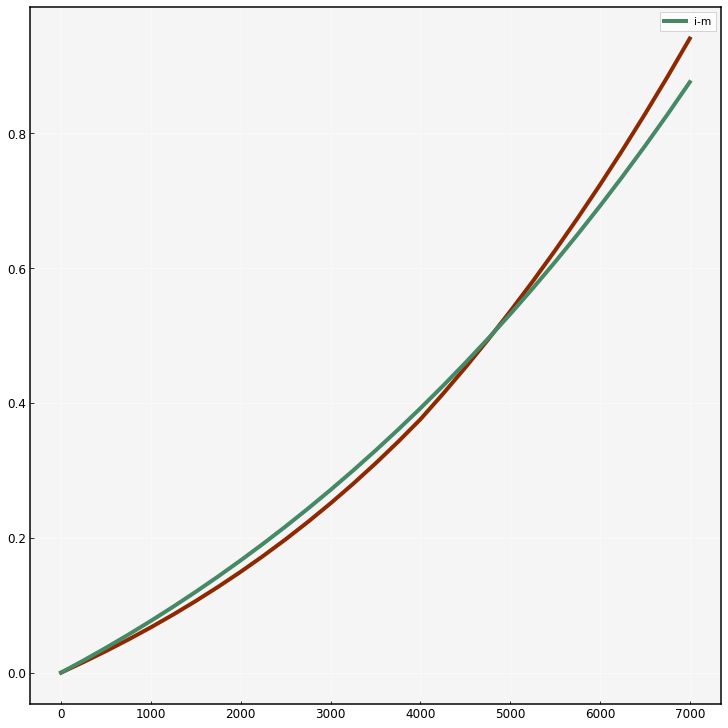

In [19]:
pressures = np.arange(0, 7.250e3, 250)

H2O = [a.h2o.calculate_solubility(p, T_K) for p in pressures]
CO2 = [a.co2.calculate_solubility(inclusion, p, T_K) for p in pressures]
CO2im = [im.co2.calculate_solubility(inclusion, p, T_K) for p in pressures]
H2Oim = [im.h2o.calculate_solubility(inclusion, p, T_K) for p in pressures]

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(pressures, CO2)
ax.plot(pressures, CO2im, label="i-m")
plt.legend()
plt.show()

In [ ]:
pd.DataFrame({"P":pressures, "CO2":CO2, "CO2im": CO2im})